# Data Analysis Project - Kobe Career Data Analysis


# Overview: 

We worked on 4 different questions that dive into Kobe's career with the Lakers. We look into the way Kobe plays along with his impact on the Lakers. We hope to discover through data how Kobe moved on to become one of the greatest of all time and to show that his name was not understated or overhyped. 

1) Question and Background  
2) Data Description  
3) Data Cleaning/Processing  
4) Data Visualization  
5) Data Analysis & Results  
6) Ethics and Privacy  
7) Conclusion & Discussion  

# Research Questions


Our Questions include:
- Q1 What are Kobe's Favorite Shot locations on the court
  - Q1a. How does his shot progress as his career progresses 

- Q2.  How many games do the Lakers win with Kobe on the team than without (strictly during the time Kobe was active 1996-2016)?

- Q3. Which starting lineup was Kobe Bryant the most successful; we define new lineups as major changes where 1 or more players starting players (the 5 starters of the team) are swapped out. We will quantify this by examining Kobe Bryant's average points scored per minute within a certain lineup.

- Q4. How does Kobe's score affect the Laker's outcome of a game?

## Background & Prior Work

We wanted to do a critical analysis of Kobe Bryant's career in a different way. We are motivated by the fact that this is an interesting topic to consider, as well as to pay tribute to his career that has touched many lives.
Even before his tragic passing, he was an inspiration to millions of people all across the world. He was beyond a great basketball player, he was the epitomy of discipline and self realization. We wanted to dig deeper into the impact he had on the Lakers as a team as well as the NBA. Our initial hypothese was created through watching Kobe. We were all fans of Kobe and no one could ever say that he was not one of the greatest to ever play. We decided that we would provide undisputed evidence for this claim.

Some references and similar projects: <br>
https://www.lakersuniverse.com/kobe/kobe_bryant_achievements.htm <br>
https://mambaout.com/achievements.html <br>
https://graphics.latimes.com/kobe-every-shot-ever/ <br>
https://community.jmp.com/t5/JMP-Blog/Kobe-Bryant-took-30-699-shots-and-I-ve-plotted-them-all-using/ba-p/30713




## Main Hypothesis:
 We believe that Kobe Bryant had a significant impact on the Laker's Orginization during his 20 years with them. We want to know how Kobe's playing style progressed as he progressed through his later years. 

Datasets will be included in Data Cleaning/Analysis sections as our datasets are too different to include here.

# Question 1: What are Kobe's Favorite Shot locations on the court?
   - # 1a: How does his shot progress as his career progresses?

# Hypothesis
#### 1: Kobe's likes to shoot inside the free throw lane.
##### 1a : As his career progresses he expands his range and shoots outside of the perimeter.

## Datasets:
This dataset was taken from kaggle : https://www.kaggle.com/c/kobe-bryant-shot-selection
 - locations of his shots
 - type of shots
 - game
 - seconds let when he shot
 - etc


# Data Gathering and Cleaning

In [1]:
# Import 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import csv
import requests
from sys import *

import bs4
from bs4 import BeautifulSoup
import re

# Read the Kaggle DataFrame
kobe_df = pd.read_csv('./data.csv')
# Global list for analysis
kb_seasons_df = []

In [2]:
kobe_df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
kobe_df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000



The above cells reads in the data.csv obtained from kaggle. This is the main dataset we will use to process questions 1 and 1a.
We will get rid of any rows that have none values in them like so:

In [4]:
kobe_df = kobe_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# Data Analysis and Results
For this part of the analysis. I created modularized functions in order to effectively generate the required heat maps. This way, he was able make the code as clean as possible. In order to do this analysis, Diraksa referenced a draw court map from http://savvastjortjoglou.com/nba-shot-sharts.html

In [5]:
"""
This Function helps to draw a basketball court to showcase our data of shot coordinates by Kobe Bryant
"""

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [6]:
def draw_figure():
    """
    This Function helps to call the draw court function
    """
    plt.figure(figsize=(12,11))
    draw_court(outer_lines=True)
    plt.xlim(-300,300)
    plt.ylim(-100,500)
    plt.show()

### We can see the court below here:

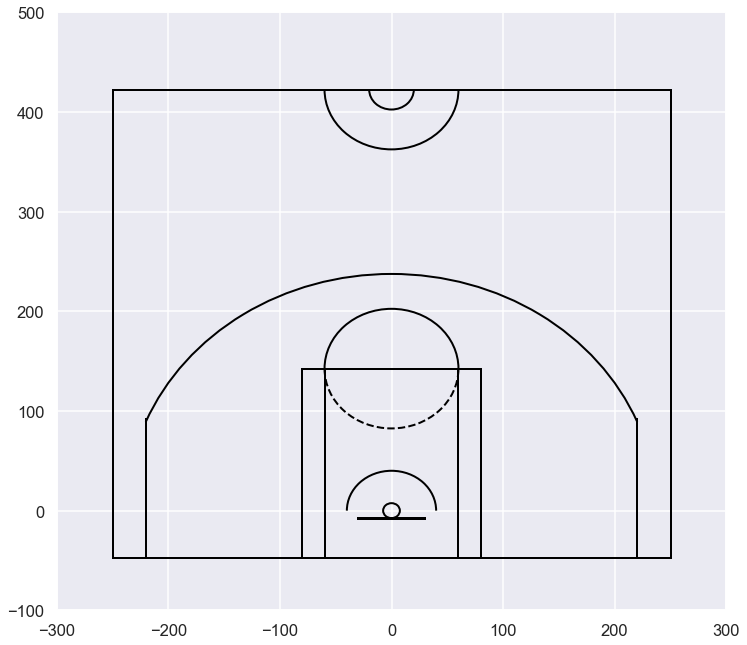

In [7]:
draw_figure()

#### After this draw court figure, I had to choose the correct seasons that I wanted to analyze. I wanted to analyze Kobe's seasons in 4 year increments since this will give us enough graphs in his 20 year season. I also wanted to see all of his seasons shot locations in one heat map.
#### Here are the functions I created below:

In [8]:
def create_seasons_df():
    """
    This function creates all the seasons df and appends them to the list to analyze later.
    
    Parameters:
    None:
    
    Returns:
    None
    
    """
    # Grab increments of every 4 seasons of kobe bryant
    kb_1st_bool = kobe_df['season'] =='1996-97'
    kb_1st_df = kobe_df[kb_1st_bool]

    kb_2nd_bool = kobe_df['season'] == '1999-00'
    kb_2nd_df = kobe_df[kb_2nd_bool]

    kb_3rd_bool = kobe_df['season'] == '2003-04'
    kb_3rd_df = kobe_df[kb_3rd_bool]
    
    kb_4th_bool = kobe_df['season'] == '2007-08'
    kb_4th_df = kobe_df[kb_4th_bool]

    kb_5th_bool = kobe_df['season'] == '2011-12'
    kb_5th_df = kobe_df[kb_5th_bool]

    kb_6th_bool = kobe_df['season'] == '2015-16'
    kb_6th_df = kobe_df[kb_6th_bool]   
    
    kb_seasons_df.append(kb_1st_df)
    kb_seasons_df.append(kb_2nd_df)
    kb_seasons_df.append(kb_3rd_df)
    kb_seasons_df.append(kb_4th_df)
    kb_seasons_df.append(kb_5th_df)
    kb_seasons_df.append(kb_6th_df)

In [9]:
# single shot map, might not need.
def create_shot_map(dataframe, title):
    """
    THIS FUNCTION CREATES A HEAT MAP FOR EACH INDIVIDUAL X,Y SHOT LOCATION
    IN THE DATAFRAME
    """
    assert isinstance(dataframe, pd.DataFrame)
    assert isinstance(title, str)
    assert len(title) > 0
    
    # Shot location of the dataframe
    x = dataframe['loc_x']
    y = dataframe['loc_y']
    
    # min and max for boundaries on the court
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()


    # Creates the plots
    fig, ax = plt.subplots(figsize=(8, 6))

    # Emphasis on black hex edges
    hb = ax.hexbin(x, y, gridsize=30, bins='log', cmap='YlOrRd',mincnt = 1, edgecolor='black')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    cb = fig.colorbar(hb, ax=ax)
    ax = draw_court(outer_lines = True)
    ax.set_title(title)


    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)
    plt.show()

In [10]:
def create_heat_maps():
    """
    This function creates all the heat maps.
    
    Parameters:
    None
    
    Returns:
    None
    
    """
    
    # 1st, 4th, 8th, 12th, 16th, 20th season and all seasons heatmap
    create_shot_map(kb_seasons_df[0], "Kobe Bryant - First Season 1996-97")
    create_shot_map(kb_seasons_df[1], "Kobe Bryant - 4th Season 1999-00")
    create_shot_map(kb_seasons_df[2], "Kobe Bryant - 8th Season 2003-04")
    create_shot_map(kb_seasons_df[3], "Kobe Bryant - 12th Season 2007-08")
    create_shot_map(kb_seasons_df[4], "Kobe Bryant - 16th Season 2011-12")
    create_shot_map(kb_seasons_df[5], "Kobe Bryant - 20th Season 2015-16")
    create_shot_map(kobe_df, "Kobe Bryant - All Seasons")
    #create_shot_map(kb_15_c_df, "Kobe Bryant Last Season 2015-16") 

In [11]:
def main():
    create_seasons_df()
    create_heat_maps()

##### Data Analysis: - 
   - Q1. What are Kobe's Favorite Shot locations on the court
       - Q1a. How does his shot progress as his career progresses 
#### For this analysis I created a main function to easily cater to our needs.
#### Let's first look at Kobe's favorite shot locations for all of the 4 year increments in his seasons and then all of his shot locations from all of his combined seasons.

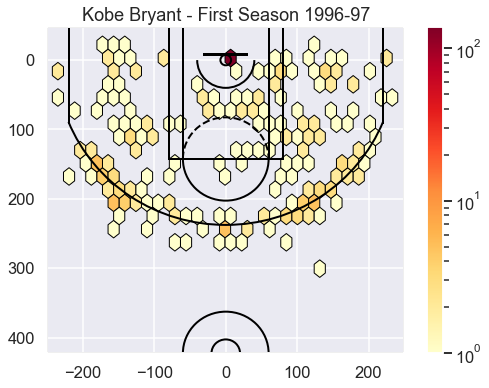

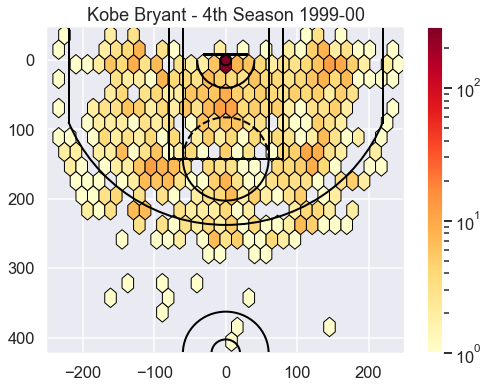

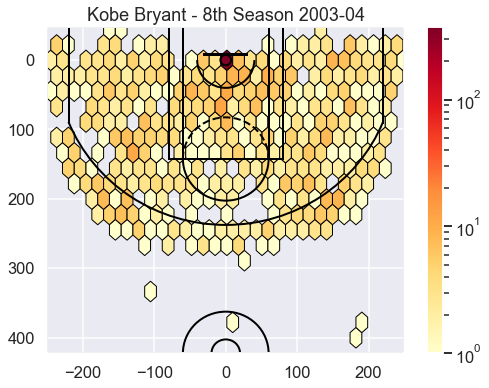

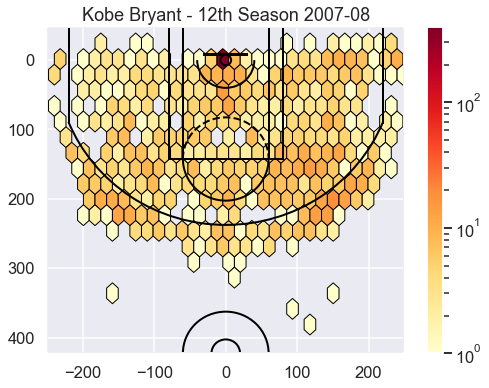

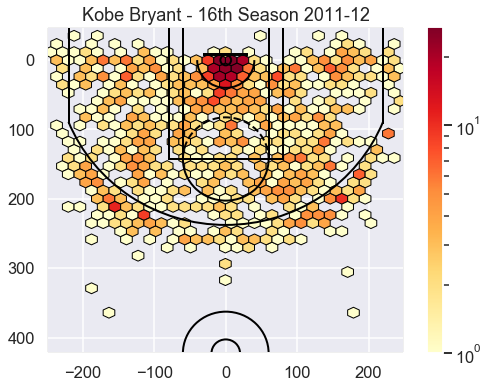

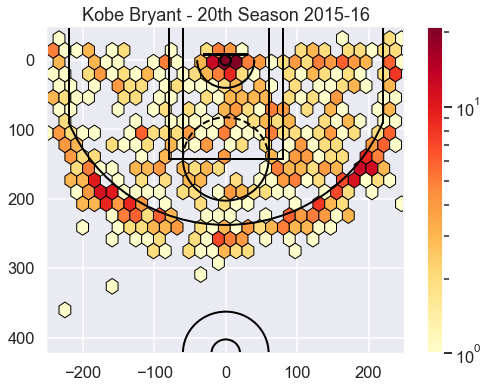

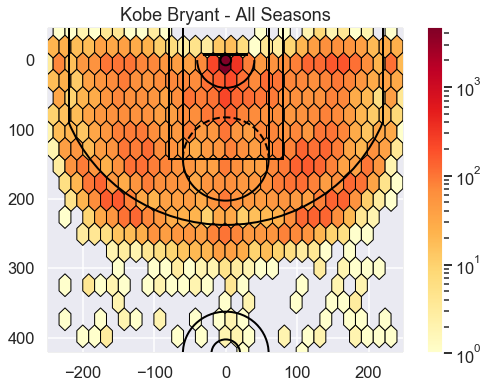

In [12]:
main()

##### Results for Q1
An interesting thing to take away is that Kobe Bryant did not really play too much during his first season in the NBA. He had very limited playing time HOWEVER, We already notice a few clusters from his first seasons that will eventually progress into his later seasons. We see his favorite shot locations start to gather aroud the perimeters of the free throw lane, instead of inside the freethrow lane.

In his 4th season, we do see more notable clusters forming inside the free throw lane. As his seasons progress we see more definitive clusters form around the arc of the three point line as well.

###### Results for Q1a
In order to answer this question, we have to see the incremental progress of all of kobe's seasons. We notice that around the halfway mark 12 - 16, we see kobe shoot more three pointers. This could be due to the fact that Kobe's relentless drive and diciplined attitude came with many injuries. Throughout his career, Kobe has been known to play even on a torn achille's heel. With injuries and fatigued, as well as old age creeping up, it would make sense that Kobe would shoot more 3 pointers or shoots around the perimeter than to dunk or drive the ball as he would in his youth.

# Question 2: How many games do the Lakers win with Kobe on the team than without (strictly during the time Kobe was active 1996-2016)? 

## Datasets

For this question we scraped data from basketball-reference.com. We dove into every year Kobe was active and extracted data of the games (ex: https://www.basketball-reference.com//players/b/bryanko01/gamelog/1997). All together, we have data from 1550 games in total. For some of these games Kobe was injured or not playing. We will primarily be using the Results section of each game and whether Kobe played for the game to determine the answer to our question.

In [13]:
site = "https://www.basketball-reference.com/players/b/bryanko01.html"
page = requests.get(site)
soup = BeautifulSoup(page.content, "html.parser")

In [14]:
table = soup.find_all(href=re.compile("/players/b/bryanko01/gamelog/"))
links = []
for html in table:
    links.append("https://www.basketball-reference.com/" + html['href'])
    
#Truncating the list as duplicate links were listed
del links[20:]

#Retrieving every game Kobe has played based on the links previously retrieved
year_links = []

for year in links:
    year_links.append(year)

In [15]:
def gatherdataframes(links):
    
    dataframes = []
    for i in links:
        df = pd.read_html(i)
        dataframe = df[7]
#         data = dataframe[dataframe['G'].notna()]
        data = dataframe[dataframe['G'] != 'G']
        data = data.reset_index(drop=True)
        dataframes.append(data) 
    return dataframes

In [16]:
# list_of = gatherdataframes(year_links)
# print(list_of)
all_df = pd.concat(gatherdataframes(year_links), ignore_index = True, sort=False)


In [17]:
all_df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,NaN,1996-11-01,18-070,LAL,NaN,PHO,W (+14),Did Not Play,Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,NaN
1,2,1,1996-11-03,18-072,LAL,NaN,MIN,W (+6),0,6:22,...,1,1,0,0,1,1,1,0,-1.1,NaN
2,3,2,1996-11-05,18-074,LAL,@,NYK,W (+6),0,3:16,...,0,0,0,0,0,1,0,1,-1.1,NaN
3,4,3,1996-11-06,18-075,LAL,@,CHH,L (-10),0,6:49,...,0,0,0,0,0,3,0,5,0.7,NaN
4,5,4,1996-11-08,18-077,LAL,@,TOR,L (-1),0,17:15,...,3,3,0,0,1,0,3,10,5.2,NaN


# Data Gathering and Cleaning

We know that this dataset marks all the games Kobe did not play in as NaN in the Game column. For the purposes of our question we regard Did Not Play, Inactive, Did Not Dress, Not With Team and Player Suspended as not playing. We only take into account the years Kobe played with the Lakers (1997-2016). We prepare our data. 

In [18]:
all_df.columns = ['Rk', 'Game', 'Date', 'Age', 'Team', 'W', 'Opponent', 'Results', 'Games Started', 'Minutes Played', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']
all_df = all_df.drop(columns=['Rk', 'Age', 'W', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'])
#all_df.describe()

Using the describe() and value_counts() methods on the Games started column, we get a better understanding of what kind of data we have.  

In [19]:
all_df['Games Started'].describe()

count     1550
unique       7
top          1
freq      1198
Name: Games Started, dtype: object

In [20]:
all_df['Games Started'].value_counts()

1                   1198
0                    148
Inactive             101
Did Not Dress         48
Not With Team         37
Did Not Play          11
Player Suspended       7
Name: Games Started, dtype: int64

We notice the Inactive, Did Not Dress, Not With Team, Did Not Play, and Player Suspended in the Games Started Column are equal to the number of NaN in the Game column

In [21]:
valcounts_sum = all_df['Games Started'].value_counts()[2] + all_df['Games Started'].value_counts()[3]+ all_df['Games Started'].value_counts()[4]+ all_df['Games Started'].value_counts()[5]+ all_df['Games Started'].value_counts()[6]
print(valcounts_sum)

204


In [22]:
sumofnotplayed = all_df['Game'].isna().sum()
sumofnotplayed

204

In [23]:
assert(valcounts_sum == sumofnotplayed)

In [24]:
totalgames = len(all_df)
kobetotgames = totalgames -sumofnotplayed
print ("Total Laker Games: ", totalgames, "Total Laker Games with Kobe: ", kobetotgames)

Total Laker Games:  1550 Total Laker Games with Kobe:  1346


We will need to convert our Wins and Losses to numerical values. We do not care for the number of points with which the Lakers won or lost. We only care whether they won or lost. We convert Wins = 1 and Losses = 0. 

In [25]:
def convert_results(results):
    results.to_list()
    for i in range(len(results)): 
        if 'W' in results[i]: 
            results[i] = 1
        elif 'L' in results[i]: 
            results[i] = 0
    return results

In [26]:
all_df['Results'] = convert_results(all_df['Results'])
all_df.head()

,Game,Date,Team,Opponent,Results,Games Started,Minutes Played
0,NaN,1996-11-01,LAL,PHO,1,Did Not Play,Did Not Play
1,1,1996-11-03,LAL,MIN,1,0,6:22
2,2,1996-11-05,LAL,NYK,1,0,3:16
3,3,1996-11-06,LAL,CHH,0,0,6:49
4,4,1996-11-08,LAL,TOR,0,0,17:15


We no longer need Minutes Played, Games Started, Opponent, and date since we can get that information from the Game column

In [27]:
all_df = all_df.drop(columns=['Minutes Played', 'Games Started', 'Opponent', 'Date', 'Team'])
all_df.head()

,Game,Results
0,NaN,1
1,1,1
2,2,1
3,3,0
4,4,0


In [28]:
all_df['Results'].value_counts()

1    920
0    630
Name: Results, dtype: int64

In [29]:
# total wins and loss 
t_wins= all_df['Results'].value_counts()[1]
t_loss = all_df['Results'].value_counts()[0]

print("Lakers Total Wins: ", t_wins, "Lakers Total Losses: ", t_loss)


Lakers Total Wins:  920 Lakers Total Losses:  630


We change all the NaNs to a number we know does not occur in the Game column. Since 999 is not used in the Game column we change NaN to 999.

In [30]:
all_df['Game'].value_counts()

2     20
4     20
3     20
5     20
1     20
      ..
78     8
79     7
80     6
82     4
81     4
Name: Game, Length: 82, dtype: int64

#### We create two separate dataframes for games Kobe was playin in and was not playing in. 

In [31]:
# now take out the ones where he played/not played
all_df['Game'].fillna(999, inplace = True)

In [32]:
totkobeplayed = all_df[all_df.Game != 999]

In [33]:
not_played = all_df[all_df.Game == 999]
assert (not_played.shape[0] == sumofnotplayed)

In [34]:
totkobeplayed.shape
assert(totkobeplayed.shape[0] == (totalgames - not_played.shape[0]))

In [35]:
totkobeplayed['Results'].value_counts()

1    836
0    510
Name: Results, dtype: int64

In [36]:
not_played['Results'].value_counts()

0    120
1     84
Name: Results, dtype: int64

In [37]:
pwins = totkobeplayed['Results'].value_counts()[1]
ploss = totkobeplayed['Results'].value_counts()[0]
print("Kobe Not Playing Wins: ", pwins, "Kobe Not Playing Losses: ", ploss)

Kobe Not Playing Wins:  836 Kobe Not Playing Losses:  510


In [38]:
npwins = not_played['Results'].value_counts()[1]
nploss = not_played['Results'].value_counts()[0]
print("Kobe Not Playing Wins: ", npwins, "Kobe Not Playing Losses: ", nploss)

Kobe Not Playing Wins:  84 Kobe Not Playing Losses:  120


In [39]:
# wins_np = rev['WL'].value_counts()
not_played['Results'].value_counts()

0    120
1     84
Name: Results, dtype: int64

## Data Analysis and Results

We want to see what our initial data looks like. Since we are looking at wins and losses, we will use a barplot. <br> First, We look at the total games:

Text(0.5, 1.0, "Total Results for Lakers during Kobe's Career")

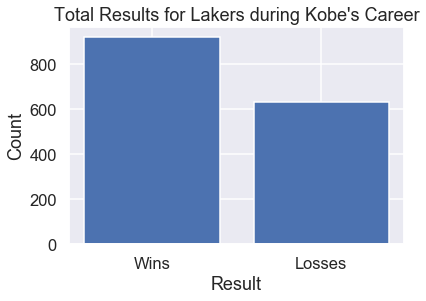

In [40]:
totgamearr = [t_wins, t_loss]
bars = ['Wins', 'Losses']
plt.bar(bars, totgamearr)
plt.ylabel('Count')
plt.xlabel('Result')
plt.title("Total Results for Lakers during Kobe's Career")

We now look at when kobe did not play, did not dress, or was injured.  

Text(0.5, 1.0, 'Results for Lakers in games where Kobe did not play')

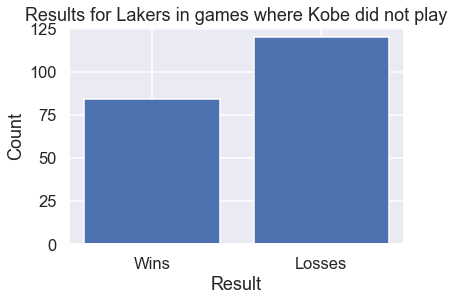

In [41]:
npgamearr = [npwins, nploss] 
plt.bar(bars, npgamearr)
plt.ylabel('Count')
plt.xlabel('Result')
plt.title("Results for Lakers in games where Kobe did not play")

Now we look at the games Kobe did play...

Text(0.5, 1.0, 'Results for Lakers in games where Kobe played')

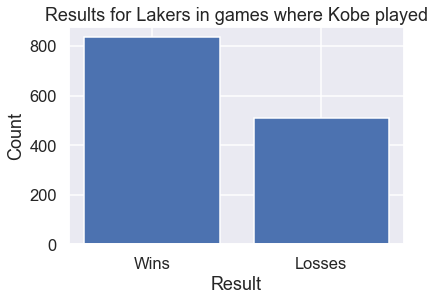

In [42]:
pgamearr = [pwins, ploss] 
plt.bar(bars, pgamearr)
plt.ylabel('Count')
plt.xlabel('Result')
plt.title("Results for Lakers in games where Kobe played")

Now that we have a visualization of our data, we take some averages. 

In [43]:
# total avg
totavgwins = t_wins/totalgames
totavgloss = t_loss/totalgames
print("Lakers Total Average Wins: ", totavgwins, "Lakers Total Average Losses: ", totavgloss)

Lakers Total Average Wins:  0.5935483870967742 Lakers Total Average Losses:  0.4064516129032258


Text(0.5, 1.0, "Total Game Averages for Lakers during Kobe's Career")

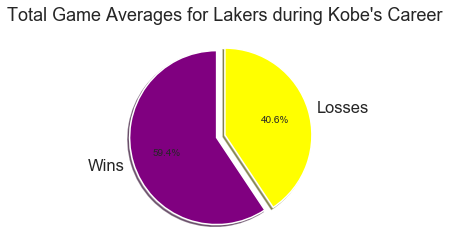

In [44]:
labels = "Wins", "Losses"
size = [totavgwins, totavgloss]
colors = ['purple', 'yellow']
explode = (0.1, 0)
plt.pie(size, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Total Game Averages for Lakers during Kobe's Career")

In [45]:
# not played avg
avgwinsnp = npwins/sumofnotplayed
avglossnp = nploss/sumofnotplayed
print("Kobe Not Playing Average Wins: ", avgwinsnp, "Kobe Not Playing Average Losses: ", avglossnp)

Kobe Not Playing Average Wins:  0.4117647058823529 Kobe Not Playing Average Losses:  0.5882352941176471


Text(0.5, 1.0, 'Averages for Lakers in games where Kobe did not play')

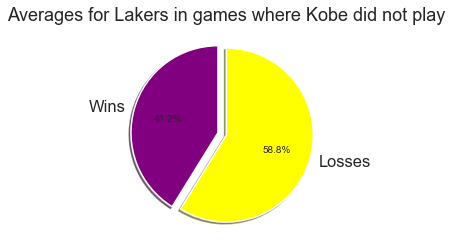

In [46]:
size = [avgwinsnp, avglossnp]
colors = ['purple', 'yellow']

plt.pie(size, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Averages for Lakers in games where Kobe did not play")

In [47]:
# played avg 
avgwinsp = pwins/kobetotgames
avglossp = ploss/kobetotgames
print("Kobe Playing Average Wins: ", avgwinsp, "Kobe Playing Average Losses:", avglossp)

Kobe Playing Average Wins:  0.6210995542347697 Kobe Playing Average Losses: 0.3789004457652303


Text(0.5, 1.0, 'Averages for Lakers in games where Kobe did play')

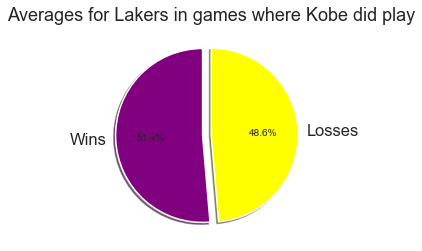

In [48]:
size = [avgwinsp, avglossnp]
colors = ['purple', 'yellow']

plt.pie(size, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Averages for Lakers in games where Kobe did play")

Looking at the data above, we notice that when Kobe was not playing, the Lakers performed worse on average. This is supported by the face that the Lakers perform better on average when Kobe plays. We then look at the total game avergaes for that time period and we see that the Lakers perfomed very well and won mor egames than lost during all of those years. This means that Kobe had a net positive effect on the Lakers and was a positive influence on the team. It is important to understand that this calculation is not taking into account his different team mates but rather as a holistic view of how the Lakers played.  

# Question 3: Which starting lineup was Kobe Bryant the most successful?

# __Hypothesis__

Kobe will perform better in teams where he has lots of experience with (the lineups he had the most games played with).

# Datasets

- Dataset Name: General Stats of Kobe Bryant's Career
- Links to the dataset:
1. https://www.basketball-reference.com/players/b/bryanko01.html
2. https://www.basketball-reference.com/players/b/bryanko01/gamelog/1997/
3. https://www.basketball-reference.com/boxscores/199611010LAL.html
- Number of observations: 1198

Using these links, I scraped all of the games that Kobe has started in (part of the starting lineup) by recursively extracting tables from the three websites above. While the list of his games goes up to around 1500, after cleaning the data, it ends up being just below 1200. 

# Data Gathering and Cleaning

In [49]:
def convert_to_PPM(points, minutes): 
    
    """Converts minutes to a float, divide points by float to get points per minute by Kobe in a game

    Parameters:
    points (string): Points Kobe made in a game
    minutes (string): Minutes Kobe played in a game
    
    Returns:
    float: Points per minute Kobe made in a game

   """
    
    indexN = minutes.index(':')
    
    minute = minutes[0:indexN]
    second = minutes[indexN+1:]
    
    seconds = int(minute)*60 + int(second)
    floatMinutes = seconds/60
    
    return float(points)/floatMinutes

In [50]:
#Retrieving the page for the table with all of Kobe's games listed by year
site = "https://www.basketball-reference.com/players/b/bryanko01.html"
page = requests.get(site)
soup = BeautifulSoup(page.content, "html.parser")

#Scraping the page to get all of the links to the games Kobe's played by year

table = soup.find_all(href=re.compile("/players/b/bryanko01/gamelog/"))

links = []

for html in table:
    links.append("https://www.basketball-reference.com" + html['href'])
    
#Truncating the list as duplicate links were listed
del links[20:] 

In [51]:
#Retrieving every game Kobe has played based on the links previously retrieved
game_links = []

for year in links:
    tempPage = requests.get(year)
    tempSoup = BeautifulSoup(tempPage.content, "html.parser")
    
    tempTable = tempSoup.find_all(href=re.compile("/boxscores/"))
    
    for tempHtml in tempTable:
        game_links.append("https://www.basketball-reference.com" + tempHtml['href'])

In [52]:
#Cleaning the links that have no data
game_links[:] = [link for link in game_links if "https://www.basketball-reference.com/boxscores/" != link]

In [53]:
#Retrieving the correct team info as both teams show up on the website
games = []

#Getting the BeautifulSoup Table, converting to Dataframe, and putting it in a list
for game in game_links:
    tempPage = requests.get(game)
    tempSoup = BeautifulSoup(tempPage.content, "html.parser")
    
    for caption in tempSoup.find_all('caption'):
        if 'Los Angeles Lakers' in caption.get_text():
            tempGame = caption.find_parent('table')
            gameDF = pd.read_html(str(tempGame))[0]
        
            #Dropping all rows that do not contain starters
            gameDF = gameDF.drop(gameDF.index[5:])
        
            #Correcting the column names
            gameDF.columns=['Starters', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']
        
            #Adding the table to the list if Kobe started in the game
            if(gameDF["Starters"].str.contains("Kobe Bryant").any()):
                games.append(gameDF)
            break

Here is what the game data scraped from the website looks like. Once all of the games have been loaded, I will make a list comprised of lists of lineups. 

In [54]:
games[0]

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Shaquille O'Neal,36:45,13,23,.565,0,0,NaN,5,10,...,4,6,10,3,0,2,1,3,31,+13
1,Nick Van Exel,32:59,8,13,.615,3,6,.500,0,0,...,1,4,5,6,4,0,3,0,19,+11
2,Kobe Bryant,31:45,5,11,.455,0,3,.000,2,3,...,1,2,3,2,2,1,3,1,12,+10
3,Eddie Jones,30:13,3,11,.273,0,4,.000,0,0,...,0,3,3,2,3,0,2,2,6,+1
4,Elden Campbell,17:56,2,4,.500,0,0,NaN,0,0,...,4,3,7,1,0,1,1,2,4,+3


In [55]:
#Making a list of lists of lineups 
lineups = []

for game in games:
    lineup = []
    
    game.set_index("Starters", inplace=True)
    lineup.append(game.index.tolist())
    lineup.append(convert_to_PPM(game.loc["Kobe Bryant"].PTS, game.loc["Kobe Bryant"].MP))
    
    lineups.append(lineup)

Once I have the lists of lists of lineups, I will loop through and find unique lineups. I also want to keep track of Kobe's total PPM with that lineup and how many times that lineup shows up to see how many times Kobe played with that lineup. This will be used to calculate Kobe's average PPM for that unique lineup, which is important for later analysis and visualizations.

In [56]:
#Sorting lineups alphabetically, creating a list of unique lineups, averaging the PPM of the unique lineups
lineups[0].append(1)
lineups[0][0].sort()
uniqueLineups = [lineups[0]]


for lineup in lineups:
    
    #Skip first iteration 
    if(lineups.index(lineup) == 0):
        continue

    lineup[0].sort()
    count = 0
    
    for players in uniqueLineups:
        count += 1
        
        if(lineup[0] == players[0]):
            players[1] += lineup[1]
            players[2] += 1
            break

        if(count == len(uniqueLineups)):
            newlineup = []
            newlineup.append(lineup[0])
            newlineup.append(lineup[1])
            newlineup.append(1)
            uniqueLineups.append(newlineup)
            break

# Data Analysis and Results

In [57]:
mostCommonLineup = uniqueLineups[0]

for lineups in uniqueLineups:
    if(lineups[2] > mostCommonLineup[2]):
        mostCommonLineup = lineups
        
print(mostCommonLineup)

[['Andrew Bynum', 'Derek Fisher', 'Kobe Bryant', 'Metta World Peace', 'Pau Gasol'], 80.25794852971109, 112]


As you can see above, uniqueLineups is a list of all unique lineups Kobe Bryant has played in. The first index contains a list of names of the lineup. The second index contains the summed total points per minute Kobe made with that lineup. The third variable shows how many times Kobe played with that lineup. Next, I will do some exploratory analysis on the collected data through dataframes.

In [58]:
dfLineups = pd.DataFrame(uniqueLineups, columns=["Starters", "Total Kobe PPM", "Times Played"])
dfLineups.set_index("Starters", inplace=True)

In order to get a fair idea on how Kobe's PPM varied between groups, I will now Kobe's total PPM by the number of times he played with the lineup.

In [59]:
#Averaging Kobe's PPM based on how many times he played with the team
dfLineups["Kobe PPM Average With Lineup"] = dfLineups["Total Kobe PPM"]/dfLineups["Times Played"]
dfLineups.head()

,Total Kobe PPM,Times Played,Kobe PPM Average With Lineup
Starters,,,
"[Eddie Jones, Elden Campbell, Kobe Bryant, Nick Van Exel, Shaquille O'Neal]",1.014469,2,0.507234
"[Eddie Jones, Elden Campbell, Kobe Bryant, Nick Van Exel, Travis Knight]",0.426439,1,0.426439
"[Corie Blount, Elden Campbell, Jerome Kersey, Kobe Bryant, Nick Van Exel]",1.061699,2,0.530850
"[Eddie Jones, Kobe Bryant, Nick Van Exel, Robert Horry, Shaquille O'Neal]",0.250149,1,0.250149
"[Corie Blount, Kobe Bryant, Nick Van Exel, Rick Fox, Shaquille O'Neal]",0.566038,1,0.566038


In [60]:
dfLineups.sort_values("Times Played", ascending=False).head()

,Total Kobe PPM,Times Played,Kobe PPM Average With Lineup
Starters,,,
"[Andrew Bynum, Derek Fisher, Kobe Bryant, Metta World Peace, Pau Gasol]",80.257949,112,0.716589
"[A.C. Green, Glen Rice, Kobe Bryant, Ron Harper, Shaquille O'Neal]",32.155771,54,0.595477
"[Caron Butler, Chris Mihm, Chucky Atkins, Kobe Bryant, Lamar Odom]",29.943371,46,0.650943
"[Derek Fisher, Kobe Bryant, Rick Fox, Samaki Walker, Shaquille O'Neal]",32.472603,45,0.721613
"[Derek Fisher, Kobe Bryant, Lamar Odom, Metta World Peace, Pau Gasol]",32.109344,44,0.729758


The dataframe above sorts the lineups based on descending order of experience Kobe had with the lineup (games played). Looking at the average PPM, we can already see that experience and growth with a lineup does not necessarily lead to Kobe's highest average PPM as the lineup on index 3 has a higher PPM than the lineup on index 1.

Next, I wish to analyze how to maximize Kobe's average PPM. To do this, I will sort the dataframe by descending order of average PPM.

In [61]:
dfLineups.sort_values("Kobe PPM Average With Lineup", ascending=False, inplace=True)
dfLineups.head()

,Total Kobe PPM,Times Played,Kobe PPM Average With Lineup
Starters,,,
"[Kobe Bryant, Kwame Brown, Lamar Odom, Sasha Vujačić, Smush Parker]",1.300867,1,1.300867
"[Jordan Farmar, Kobe Bryant, Kwame Brown, Lamar Odom, Luke Walton]",2.176970,2,1.088485
"[Chris Duhon, Dwight Howard, Jordan Hill, Kobe Bryant, Metta World Peace]",1.031519,1,1.031519
"[Derek Fisher, Didier Ilunga-Mbenga, Kobe Bryant, Lamar Odom, Metta World Peace]",2.049285,2,1.024643
"[Chris Mihm, Chucky Atkins, Jumaine Jones, Kobe Bryant, Sasha Vujačić]",0.996857,1,0.996857


Looking at the dataset above, lineups where Kobe only played with them once greatly misrepresent how the lineup affected his performance; they are artificially inflated. In order to lessen these effects, I will show the data where he played with the lineup at least 3 times. I chose three times because even at 2 times played, there were many data points that were misrepresentational. Also, choosing to show these data halved the amount of data there was (this could be a good or bad thing as it increases variation due to lowered sample size).

In [62]:
dfLineups2 = dfLineups[dfLineups["Times Played"] > 2]
dfLineups2.head()

,Total Kobe PPM,Times Played,Kobe PPM Average With Lineup
Starters,,,
"[Kobe Bryant, Kwame Brown, Lamar Odom, Luke Walton, Smush Parker]",18.018037,19,0.948318
"[Chris Mihm, Kobe Bryant, Kwame Brown, Lamar Odom, Smush Parker]",20.395699,22,0.927077
"[Andrew Bynum, Kobe Bryant, Lamar Odom, Maurice Evans, Smush Parker]",2.734621,3,0.911540
"[Caron Butler, Chris Mihm, Chucky Atkins, Kobe Bryant, Stanislav Medvedenko]",2.652106,3,0.884035
"[Derek Fisher, Kobe Bryant, Rick Fox, Robert Horry, Samaki Walker]",7.741503,9,0.860167


Using this modified dataset, I want to analyze how the experience Kobe has with a team affects his performance. I quantify experience by how many times he played with the lineup and performance by his PPM with the lineup.

(0.3, 1)

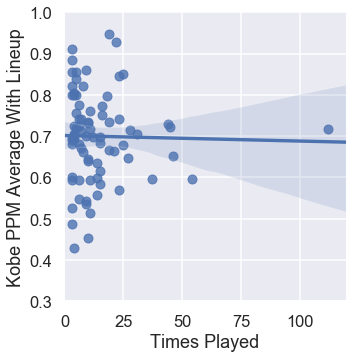

In [63]:
plot = sns.lmplot(x="Times Played", y="Kobe PPM Average With Lineup", data=dfLineups2)

#Edit axes 
axes = plot.axes
axes[0,0].set_xlim(0,)
axes[0,0].set_ylim(.3, 1)

As you can see, there is essentially no correlation between the times Kobe played with a lineup and his average PPM with the lineup. While the trend seems to be slightly negative, I do not believe this to be valid support that Kobe's average PPM decreases with amount of games played. It is not valid evidence as the variability is too high, and the trend is so extremely small that it can be considered to have no correlation at all. Also, the lineups where Kobe had the highest PPM was not the one he played in the most. A possible takeaway from this is that those lineups set Kobe up to score many points, but it did not necessarily mean that was the best outcome for the Laker's and their win percentage. From this possible takeaway, it could be speculated that prioritizing Kobe's performance in terms of score was not in the best interests of the Lakers (he could be better utilized for another roll other than the go to shooter).  

Let's see if the graph results are due to too many lineups with a low amount of games played being included. I will try to graph the same thing, but only with lineups that have 10 or more games played.

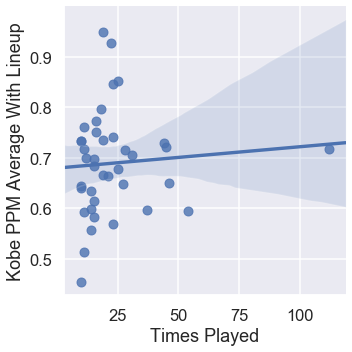

In [64]:
dfLineups10 = dfLineups[dfLineups["Times Played"] > 9]
plot = sns.lmplot(x="Times Played", y="Kobe PPM Average With Lineup", data=dfLineups10)

Again, the results seem to be similar to the first plot, except the trend is now slightly in the positive direction. For the same reasons explained earlier, I cannot accept this as valid evidence that experience with a team increases Kobe's average PPM.

To see if the team lineups where Kobe has low PPM greatly affects the graph or not, I will now plot only the top 10 lineups where Kobe had the highest average PPM.

In [65]:
dfLineupstop10 = dfLineups10.iloc[0:9]
dfLineupstop10

,Total Kobe PPM,Times Played,Kobe PPM Average With Lineup
Starters,,,
"[Kobe Bryant, Kwame Brown, Lamar Odom, Luke Walton, Smush Parker]",18.018037,19,0.948318
"[Chris Mihm, Kobe Bryant, Kwame Brown, Lamar Odom, Smush Parker]",20.395699,22,0.927077
"[Brian Cook, Chris Mihm, Kobe Bryant, Lamar Odom, Smush Parker]",21.285975,25,0.851439
"[Derek Fisher, Kobe Bryant, Lamar Odom, Luke Walton, Pau Gasol]",19.469591,23,0.846504
"[Brian Cook, Kobe Bryant, Kwame Brown, Lamar Odom, Smush Parker]",14.347932,18,0.797107
"[Andrew Bynum, Derek Fisher, Kobe Bryant, Matt Barnes, Pau Gasol]",12.359608,16,0.772475
"[Derek Fisher, Kobe Bryant, Lamar Odom, Ronny Turiaf, Vladimir Radmanović]",8.380943,11,0.761904
"[Andrew Bynum, Derek Fisher, Kobe Bryant, Luke Walton, Pau Gasol]",12.020378,16,0.751274
"[Derek Fisher, Kobe Bryant, Mark Madsen, Rick Fox, Shaquille O'Neal]",17.066640,23,0.742028


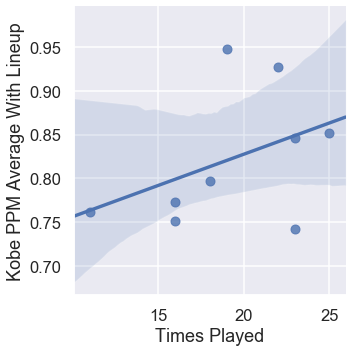

In [66]:
plot = sns.lmplot(x="Times Played", y="Kobe PPM Average With Lineup", data=dfLineupstop10)

Finally, we can see a obvious trend. In team lineups where Kobe performed well, his experience with the team seems to greatly affect his average PPM. To conclude, I believe this means that these lineups were specifically designed so that Kobe was the star shooter of the team; everyone else in the lineup was supporting him. However, loooking at the other two graphs, it is evident that Kobe, while still being a star players, was not the star shooter in the lineups that he had lots of experience with, but his PPM was relatively average or low. 

# Question 4. How does Kobe's score affect the Laker's outcome of a game?

# __Hypothesis__

My hypothesis is that Kobe's score during these games greatly influenced whether the Lakers would win. Considering his name being placed with greats like Michael Jordan and Magic Johnson, both of which consider Kobe to be a fantastic player. I hypothesized that the hype behind his name was not understated.

# __Dataset__

The Dataset comes from Lakersuniverse website that holds Kobe's game statistics through his career from 1996 to 2013. Here are the first and last years.
- https://www.basketball-reference.com/players/b/bryanko01.html

Sample Year Data:
- http://www.lakersuniverse.com/kobe/kobe_bryant_stats20122013.htm

The sample year data is an example of one year's dataset. All years are collected from the first link using BeautifulSoup.

Number of observations: 1346

# __Data Gathering and Cleaning__

The first thing I did here was use Beautiful soup to gather all the links of years Kobe has played. So I got the all the links with "gamelog" which would have the link to the individual years game data. I gathered all that data first then deleted any duplicated. Finally created a year_links that contained the links to the sites for each year Kobe played.

In [67]:
site = "https://www.basketball-reference.com/players/b/bryanko01.html"
page = requests.get(site)
soup = BeautifulSoup(page.content, "html.parser")

In [68]:
table = soup.find_all(href=re.compile("/players/b/bryanko01/gamelog/"))
links = []
for html in table:
    links.append("https://www.basketball-reference.com/" + html['href'])
    
#Truncating the list as duplicate links were listed
del links[20:]

#Retrieving every game Kobe has played based on the links previously retrieved
year_links = []

for year in links:
    year_links.append(year)

A sample for the first year.

In [69]:
year_links[0]

'https://www.basketball-reference.com//players/b/bryanko01/gamelog/1997'

This function helps me gather the dataframes from the links. It creates a list of dataframes from each year.

In [70]:
def gatherdataframes(links):
    
    dataframes = []
    for i in links:
        df = pd.read_html(i)
        dataframe = df[7]
        data = dataframe[dataframe['G'].notna()]
        data = data[data.G != 'G']
        data = data.reset_index(drop=True)
        dataframes.append(data) 
    return dataframes

Here I concatenated all the dataframes into one combined dataframe while ignoring indexes since its irrelevant.

In [71]:
list_of = gatherdataframes(year_links)
df = pd.concat(list_of, ignore_index = True, sort=False)

In [72]:
df.head(2)

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2,1,1996-11-03,18-072,LAL,NaN,MIN,W (+6),0,6:22,...,1,1,0,0,1,1,1,0,-1.1,NaN
1,3,2,1996-11-05,18-074,LAL,@,NYK,W (+6),0,3:16,...,0,0,0,0,0,1,0,1,-1.1,NaN


Here we can see there are some columns that were empty on the site, name;y "Unnamed: 5" and "Unamed:7". "Unamed: 7" is essentially how much a team won by. So I renamed it to Outcome instead. Some columns like Rk and Date do not serve any purpose in our analysis, so I dropped them.

In [73]:
dataframe = df.drop(columns=['Rk', 'G', 'Date', 'Age', 'Tm', 'GS', 'DRB', 'TRB','AST', 'STL',
                             'BLK', 'PF', 'TOV', 'GmSc', '+/-', 'ORB', 'Unnamed: 5'])
dataframe = dataframe.rename(columns={'Unnamed: 7': 'Outcome'})

Now I made a simple function to make a column that transforms the Win or Loss data to 1's and 0's. This makes analysing the data a lot easier. A value of 1 would correspond to a win while a 0 signifies a loss. In this case, I am not concerned with how much the Lakers win or lose by, but only on the actual outcome.

In [74]:
def removeExtra(string):
    check = string[0]
    if check == 'W':
        return 1
    else:
        return 0
    return check

In [75]:
dataframe["W/L"] = dataframe["Outcome"].apply(removeExtra)
dataframe.head(3)

,Opp,Outcome,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,PTS,W/L
0,MIN,W (+6),6:22,0,1,.000,0,0,NaN,0,0,NaN,0,1
1,NYK,W (+6),3:16,0,1,.000,0,0,NaN,1,2,.500,1,1
2,CHH,L (-10),6:49,2,3,.667,1,2,.500,0,0,NaN,5,0


The important columns here to keep in mind of are the PTS which stand for Points, MP or Minutes Played, W/L or Outcome. The rest of the columns correspond to steals and rebounds which are not relevant to this analysis

Since I am to check how effective Kobe was, it was best to use an average points per game. The problem came with time. In basketball, a player can play the entire 60 mins or a couple mins. It would not make sense to compare these two cases for Kobe since that would skew the data. So, I made a function that converted his play time to seconds. Then I calculated his points per second for that game, then multipled it by 60 to get the effective points per min for that game.

In [76]:
# This function first converted the minutes to seconds and created a new column of seconds played as SP
def convert_to_seconds(string):
    indexN = string.index(':')
    
    minute = string[0:indexN]
    second = string[indexN+1:]
    
    total = int(minute)*60 + int(second)
    
    return total

# This function took those seconds and points and calculated a new Points/Min which his effective points per min 
# for that game
def get_average(string, seconds):
        
    averages = []
    
    for index, value in string.items():
        points = int(value)
        playtime = seconds[index]
        average = points/playtime
        average = average * 60
        averages.append(average)
        
    series = pd.Series(averages)
    return series

dataframe["SP"] = dataframe["MP"].apply(convert_to_seconds)
dataframe['Points/Min'] = get_average(dataframe['PTS'], dataframe['SP'])

Now the data wrangling is complete and the dataframe has all the information for analysis.

In [77]:
dataframe.head(3)

,Opp,Outcome,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,PTS,W/L,SP,Points/Min
0,MIN,W (+6),6:22,0,1,.000,0,0,NaN,0,0,NaN,0,1,382,0.000000
1,NYK,W (+6),3:16,0,1,.000,0,0,NaN,1,2,.500,1,1,196,0.306122
2,CHH,L (-10),6:49,2,3,.667,1,2,.500,0,0,NaN,5,0,409,0.733496


# __Data Analysis and Results__

I needed to make a few functions here to help with graphing the data. Since Kobe had more wins than losses, putting all the data on one graph would be unhelpful. He had 836 wins and 510 losses. So, I decided to take the first 510 losses and the first 510 wins. I felt like this was a big enough sample size to truly get an approximate representation of the underlying data.

In [78]:
# This function was made to simply add a Game Number count for graphing purposes
def game_count(counter):
    return counter+1

# This function took the losses and wins created a new dataframe of that 
# info
def Win_Loss_Performance(avg, win_loss):
    loss_perf = []
    win_perf = []
    
    for index, value in win_loss.items():
        if value == 0:
            loss_perf.append(avg[index])
        else:
            win_perf.append(avg[index])
            
    temp = np.array(loss_perf)
    tempo = np.array(win_perf)
    df = pd.DataFrame(temp)
    df2 = pd.DataFrame(tempo)
    return df, df2

# Get the two dataframes of that data
df_losses, df_wins = Win_Loss_Performance(dataframe['Points/Min'], dataframe['W/L'])

Here I do some simple transformation to get the game number as a new column using the game_count function, for an accurate visual representation. Also, I dropped anything after 510 observations in the wins dataframe.

In [79]:
# Renaming columns
df_losses.columns = ['Points/Min']
df_wins.columns = ['Points/Min']

# Here I added the Game_Num column for the losses
df_losses = df_losses.reset_index()
df_losses["Game_Num"] = df_losses['index'].apply(game_count)
df_losses = df_losses.drop(columns = ['index'])

# Here for wins as well
df_wins = df_wins.reset_index()
df_wins['Game_Num'] = df_wins['index'].apply(game_count)
df_wins = df_wins.drop(columns = ['index'])
df_wins = df_wins.drop(df_wins.index[510:])

I felt the best way to visualize this data would be in a line plot. So I graphed the Game_Num versus Points/Min.

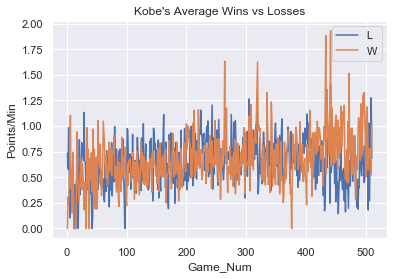

In [80]:
sns.set()
sns.lineplot(x = 'Game_Num', y = 'Points/Min', data = df_losses, label = 'L').set_title("Kobe's Average Wins vs Losses")
sns.lineplot(x = 'Game_Num', y = 'Points/Min', data = df_wins, label = 'W')

This graph shows us something interesting. Specifically how close to each other the two datasets are. There are some outliers
towards the end, this could be because once the team realized how good of a player Kobe was, they made sure he had the 
opportunity to make more shots. This being proven by the relatively low blue outliers towards the end. If the team lost while 
giving Kobe the ball, it meant he was not making those shots count.

I decided to graph the separate datasets into a single one to see the values side by side.

In [81]:
df_set = dataframe.sort_values( by =['W/L'], ascending=True, inplace=False)
df_final = df_set.drop(df_set.index[1020:])
df_final = df_final.reset_index()
df_final["Game_Num"] = df_final['index'].apply(game_count)
df_final = df_final.drop(columns = ['index'])

Text(0.5, 1.0, "Kobe's Average Wins vs Losses")

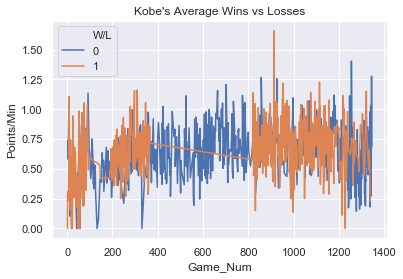

In [82]:
sns.lineplot(x = 'Game_Num', y = 'Points/Min', data = df_final, hue = 'W/L').set_title("Kobe's Average Wins vs Losses")

Here it becomes clearer how close the values are to each other. If we take a look at the mean function for wins vs losses, we notice the same thing.

In [83]:
win_avg = df_wins.mean()[0]
loss_avg  = df_losses.mean()[0]
string = str(win_avg)
string2 = str(loss_avg)
print('Points/Min of a Win ' + string)
print('Points/Min of a Loss ' + string2)

Points/Min of a Win 0.6779194194093353
Points/Min of a Loss 0.6440620623661851


The thing to take note of here was that these numbers show how consistent Kobe was. Even during a loss, he performed almost 
as well as if they were going to win. He was good because he was consistent.

# Ethics & Privacy 

Our question poses many ethical questions. One of which is how do we take into account all of the other players' contributions, how do we make a conclusion without giving any other factors consideration? Our question is biased in the way that we are primarily focusing on Kobe and his contributions. Also, for the analysis of question 3, if it is used to create lineups revolving around setting up a certain player, team owners could choose to drop some of their players and draft others all for the sake of upping team performance. This is an ethical issue because those players who are dropped lose their prestigious and (most likely) high paying job due to the code from this project.

# Conclusion & Discussion

Throughout his career in the NBA, Kobe has made a notable impact on not only the game of basketball, but to fans around the world. When Kobe's death was brought to light, a little piece of us, whom were basketball fanatics, died along with him. Kobe's contributions to the Laker Organization and Basketball World will not only be memorable, but a legacy that will on forever.

Kobe's shot attempts, at various locations of the basketball court, has propelled his team's winnings from our initial analysis. We looked at Kobe's best team he played with - which supported his role as being the shooter. Kobe was payed a tremendous amount of dollars to shoot the ball - and he shot it well. He shot all over the court, and adapted to the trends the current game of basketball is today. There are a lot more 3-pt shots this day and age, ( Golden State Warrior's Steph Curry - is most notable for this) than in previous years of the NBA. Kobe knew this, and changed his game to mimic the best. It isn't a suprise that Kobe's relentless drive and attitude led the Lakers' Orginization to 5 championships while he was there. 

These are some of the data that supports why Kobe has made a major impact to not only his team's winnings, the teammates he played with on the court, and the various fans from all over the world that watched this 17 year old phenom shake the inner workings of the NBA. We slowly, and methodically have watched Kobe evolve his game to fit the needs of the NBA climate. His consistency and work ethic are the one of the hall marks that will forever be ingrained in our memory of Kobe Bryant. This limited report does not explain the vast accomplishments and accolades acquired in his 20 year tenure at the Lakers. He has undoubtedly shaped the world of basketball forever.